### Predictions
1. The higher the debt to income ratio a borrower has, the greater the risk of default.
1. The number of accounts increases the credit risk
1. Significant number of derogatory marks increases risk.


In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
# Import the data
file_path = os.path.join("./Resources/lending_data.csv")
cr = pd.read_csv(file_path)
cr.head()

# Define the X (features) and y (target) sets
y = cr['loan_status'].values
X = cr.drop('loan_status', axis=1)



,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


In [19]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Train a Random Forest Classifier model and print the model score
cr_rfc = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {cr_rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {cr_rfc.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917973586463062


In [21]:
feature_importances = cr_rfc.feature_importances_

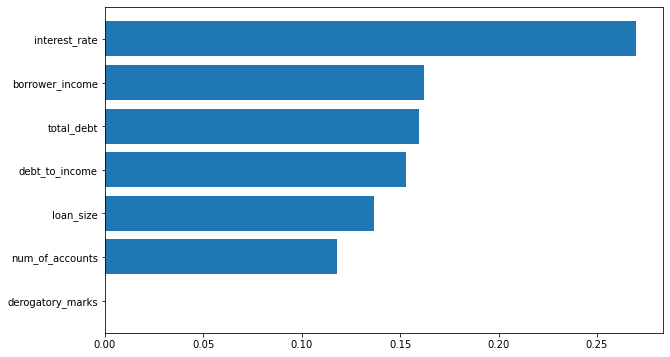

In [30]:
features = sorted(zip(X.columns, cr_rfc.feature_importances_), key=lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10, 6)
plt.margins(y=0.05)
ax.barh(y=cols, width=width)

plt.show()


In [36]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(cr_rfc)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                 random_state=1))

In [35]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\cbatl\Anaconda3\envs\-Python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Train a Logistic Regression model print the model score